# Tarea 16 - Sebastián Negrete Aragón - Física Computacional
# Semestre 2017-2

In [1]:
include("modulos/herramientas.jl")

herramientas

In [2]:
using PyPlot

## Ejercicio 2

### ¿Cómo se define una matriz simétrica?

Se dice que una una matriz cuadrada es simétrica si es igual a su matriz transpuesta. Escrito en lenguaje matemático:

$$A\in\{\mathscr{M}_n(K) \} \Longrightarrow A\in\{A\in\{\mathscr{M}_n(K)\}\:|\: A=A^T\} \Longleftrightarrow a_{ij}=a_{ji}\:\forall i,j=1,2,3,...,n$$

Donde $a_{ij}$ es el elemento de matriz del _i_-ésimo renglón y de la _j_-ésima columna de $A$ y $K$ es el campo donde definimos a nuestras matrices.

## Ejercicio 3

### ¿Cómo se puede construir una matriz simétrica a partir de una matriz cuadrada?

Si $A\in\{\mathscr{M}_n(K) \}$ podemos construir una matriz $B\in\{\mathscr{M}_n(K)\}$ a partir de $A$ tal que $B\in\{\mathscr{M}_n(K)\}\:|\: A=A^T\}$, es decir $B$ sea una matriz simétrica. Dicha construcción es simplemente definir a $B$ como:

$$B=A+A^T$$

_Demostración_:

Sean $A\in\{\mathscr{M}_n(K) \}$ y $a_{ij}$ el elemento de matriz del _i_-ésimo renglón y de la _j_-ésima columna de $A$ con $i,j=1,2,3,...,n$

$\Longrightarrow$ $a_{ij}^T$ que es el elemento de matriz del _i_-ésimo renglón y de la _j_-ésima columna de $A^T$ cumple:
$$a_{ij}^T=a_{ji}$$

Por lo que si $B$ es la matriz resultante de la suma de $A$ y $A^T$, y $b_{ij}$ es el elemento de matriz del _i_-ésimo renglón y de la _j_-ésima columna de $B$ se tendría:
$$b_{ij}=a_{ij}+a_{ij}^T=a_{ij}+a_{ji}$$

Mientras que para $b_{ji}$:
$$b_{ji}=a_{ji}+a_{ji}^T=a_{ji}+a_{ij}=a_{ij}+a_{ji}$$

$$\Longrightarrow b_{ij}=b_{ji}$$

$$\therefore B=B^T$$

$$\blacksquare$$

## Ejercicio 4

Construya el propagador $e^{A t}$ para cada tiempo sobre una malla y uselo para propagar un estado inicial $\vec x_0$ cualquiera. Utilice:
$$A=\left(\begin{array}{cc} 1 & 1\\ -1 & 1 \end{array} \right).$$
* Grafique la trayectoria en el espacio de fase.

In [3]:
#Matriz a usar en la exponencial
A=[1 1; -1 1]

2×2 Array{Int64,2}:
  1  1
 -1  1

In [4]:
#Obtenemos los eigenvectores y hacemos la matriz w
w=eigvecs(A)

2×2 Array{Complex{Float64},2}:
 0.707107+0.0im       0.707107-0.0im     
      0.0+0.707107im       0.0-0.707107im

In [5]:
#Obtenenmos los eigenvalores
vals=eigvals(A)

2-element Array{Complex{Float64},1}:
 1.0+1.0im
 1.0-1.0im

In [6]:
#Nuestra función del propagador, a los eigenvalores se les aplica la exponencial y se usan dichos valores evaluados para
#hacer una matriz diagonal que multiplicamos por w y la inversa de w
F(t)=w*diagm(exp.(vals*t))*inv(w)

F (generic function with 1 method)

### Implementación para $\vec{x_0}$ cualquiera

In [7]:
#Función que simplifica la función map
function ent(lista,entrada)
    listent=map(x->x[entrada],lista)
    return listent
end

ent (generic function with 1 method)

In [8]:
#Código que evalua nuestra función aplicada a un rango de valores de t y la multiplica por la condicion inicial x_0
a=3*(2*rand(1)-1)
b=3*(2*rand(1)-1)
M=[a,b]
listx=[] #Arreglo sin rango
for t in linspace(0,10,1000)
    vs=F(t)*M
    push!(listx,vs) #Arroja una lista con los valores de la evaluación de F(t) por M
end

In [9]:
listax=ent(listx,1) #Primera entrada de la lista de salida
listay=ent(listx,2) #Segunda entrada de la lista de salida

1000-element Array{Array{Complex{Float64},1},1}:
 Complex{Float64}[1.63827+0.0im] 
 Complex{Float64}[1.62737+0.0im] 
 Complex{Float64}[1.61593+0.0im] 
 Complex{Float64}[1.60392+0.0im] 
 Complex{Float64}[1.59135+0.0im] 
 Complex{Float64}[1.5782+0.0im]  
 Complex{Float64}[1.56447+0.0im] 
 Complex{Float64}[1.55014+0.0im] 
 Complex{Float64}[1.53521+0.0im] 
 Complex{Float64}[1.51966+0.0im] 
 Complex{Float64}[1.50349+0.0im] 
 Complex{Float64}[1.4867+0.0im]  
 Complex{Float64}[1.46926+0.0im] 
 ⋮                               
 Complex{Float64}[-4998.78+0.0im]
 Complex{Float64}[-4420.91+0.0im]
 Complex{Float64}[-3830.46+0.0im]
 Complex{Float64}[-3227.29+0.0im]
 Complex{Float64}[-2611.28+0.0im]
 Complex{Float64}[-1982.27+0.0im]
 Complex{Float64}[-1340.15+0.0im]
 Complex{Float64}[-684.77+0.0im] 
 Complex{Float64}[-15.9993+0.0im]
 Complex{Float64}[666.299+0.0im] 
 Complex{Float64}[1362.26+0.0im] 
 Complex{Float64}[2072.02+0.0im] 

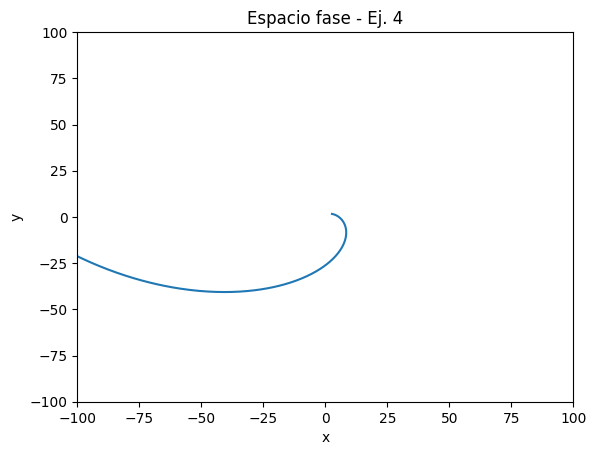

/usr/local/lib/python2.7/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


PyObject <matplotlib.text.Text object at 0x7f32bf825890>

In [10]:
#Graficamos
plot(listax,listay)
    title("Espacio fase - Ej. 4")
    xlim([-100,100]) #Límite en x
    ylim([-100,100]) #Límite en y
    xlabel("x")
    ylabel("y")

FIN